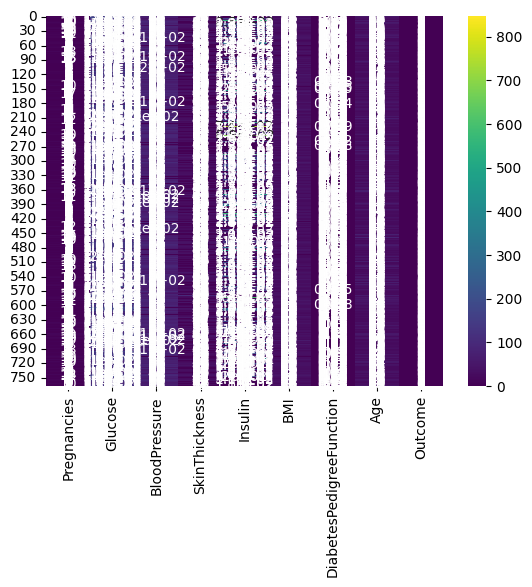

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("diabetes.csv")

# Create a heatmap
sns.heatmap(df, annot=True, cmap='viridis')

# Show the plot
plt.show()

In [2]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target

# Convert to DataFrame for better visualization
df = pd.DataFrame(X, columns=diabetes.feature_names)
df['Target'] = y

# Min-Max scaling
min_max_scaler = MinMaxScaler()
X_min_max_scaled = min_max_scaler.fit_transform(X)

# Standardization
standard_scaler = StandardScaler()
X_standard_scaled = standard_scaler.fit_transform(X)

# Convert back to DataFrame for visualization (optional)
df_min_max_scaled = pd.DataFrame(X_min_max_scaled, columns=diabetes.feature_names)
df_min_max_scaled['Target'] = y

df_standard_scaled = pd.DataFrame(X_standard_scaled, columns=diabetes.feature_names)
df_standard_scaled['Target'] = y

# Visualize scaled dataframes (optional)
print("Min-Max Scaled Data:")
print(df_min_max_scaled.head())
print("\nStandardized Data:")
print(df_standard_scaled.head())


Min-Max Scaled Data:
        age  sex       bmi        bp        s1        s2        s3        s4  \
0  0.666667  1.0  0.582645  0.549296  0.294118  0.256972  0.207792  0.282087   
1  0.483333  0.0  0.148760  0.352113  0.421569  0.306773  0.623377  0.141044   
2  0.883333  1.0  0.516529  0.436620  0.289216  0.258964  0.246753  0.282087   
3  0.083333  0.0  0.301653  0.309859  0.495098  0.447211  0.233766  0.423131   
4  0.516667  0.0  0.206612  0.549296  0.465686  0.417331  0.389610  0.282087   

         s5        s6  Target  
0  0.562217  0.439394   151.0  
1  0.222437  0.166667    75.0  
2  0.496578  0.409091   141.0  
3  0.572923  0.469697   206.0  
4  0.362385  0.333333   135.0  

Standardized Data:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.800500  1.065488  1.297088  0.459841 -0.929746 -0.732065 -0.912451   
1 -0.039567 -0.938537 -1.082180 -0.553505 -0.177624 -0.402886  1.564414   
2  1.793307  1.065488  0.934533 -0.119214 -0.958674 -0.718897

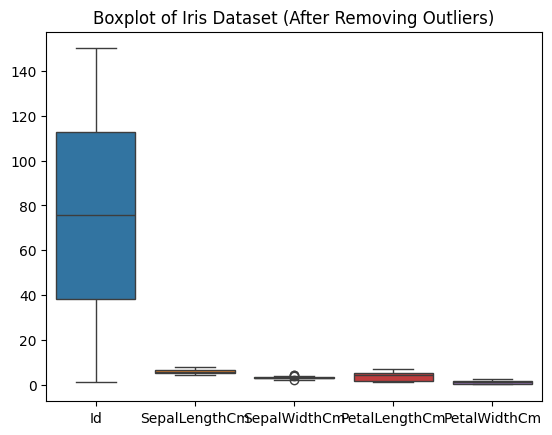

In [4]:
iris_df = pd.read_csv("iris.csv")
# Function to remove outliers based on IQR
def remove_outliers_iqr(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
    return dataframe[~outliers]

# Specify the correct column name for which you want to remove outliers
column_to_remove_outliers = 'SepalLengthCm'  # Adjust this based on the actual column name

# Remove outliers based on IQR
iris_df_no_outliers = remove_outliers_iqr(iris_df, column_to_remove_outliers)

# Boxplot after removing outliers
sns.boxplot(data=iris_df_no_outliers)
plt.title('Boxplot of Iris Dataset (After Removing Outliers)')
plt.show()

Original Diabetes Dataset:
   Preg  Glu  BP  SkinThick  Insulin   BMI    DPF  Age  Outcome
0     6  148  72         35        0  33.6  0.627   50        1
1     1   85  66         29        0  26.6  0.351   31        0
2     8  183  64          0        0  23.3  0.672   32        1
3     1   89  66         23       94  28.1  0.167   21        0
4     0  137  40         35      168  43.1  2.288   33        1


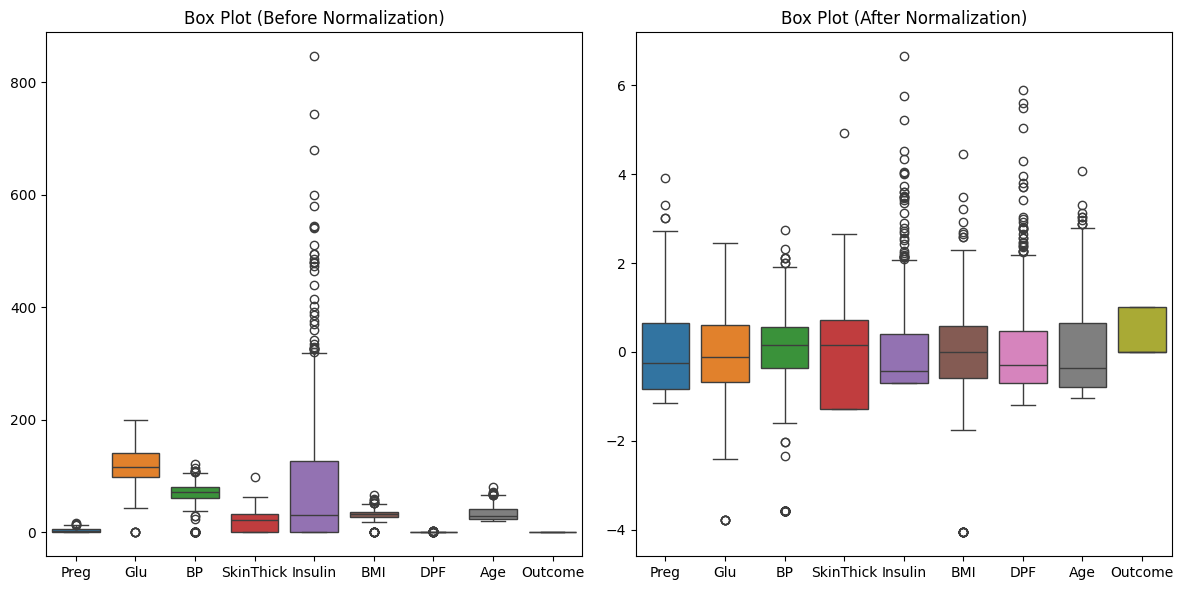

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

diabetes_path = 'diabetes.csv'
diabetes_df = pd.read_csv(diabetes_path)

# Shortened attribute names
short_names = ['Preg', 'Glu', 'BP', 'SkinThick', 'Insulin', 'BMI', 'DPF', 'Age', 'Outcome']
diabetes_df.columns = short_names

print("Original Diabetes Dataset:")
print(diabetes_df.head())

diabetes_df.dropna(inplace=True)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=diabetes_df)
plt.title("Box Plot (Before Normalization)")

scaler = StandardScaler()
diabetes_df_normalized = pd.DataFrame(scaler.fit_transform(diabetes_df.drop('Outcome', axis=1)), columns=diabetes_df.columns[:-1])
diabetes_df_normalized['Outcome'] = diabetes_df['Outcome']

plt.subplot(1, 2, 2)
sns.boxplot(data=diabetes_df_normalized)
plt.title("Box Plot (After Normalization)")

plt.tight_layout()
plt.show()


Original Iris Dataset:
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0  1.0            5.1           3.5            1.4           0.2  Iris-setosa
1  2.0            4.9           3.0            1.4           0.2  Iris-setosa
2  3.0            4.7           3.2            1.3           0.2  Iris-setosa
3  4.0            4.6           3.1            1.5           0.2  Iris-setosa
4  5.0            5.0           3.6            1.4           0.2  Iris-setosa


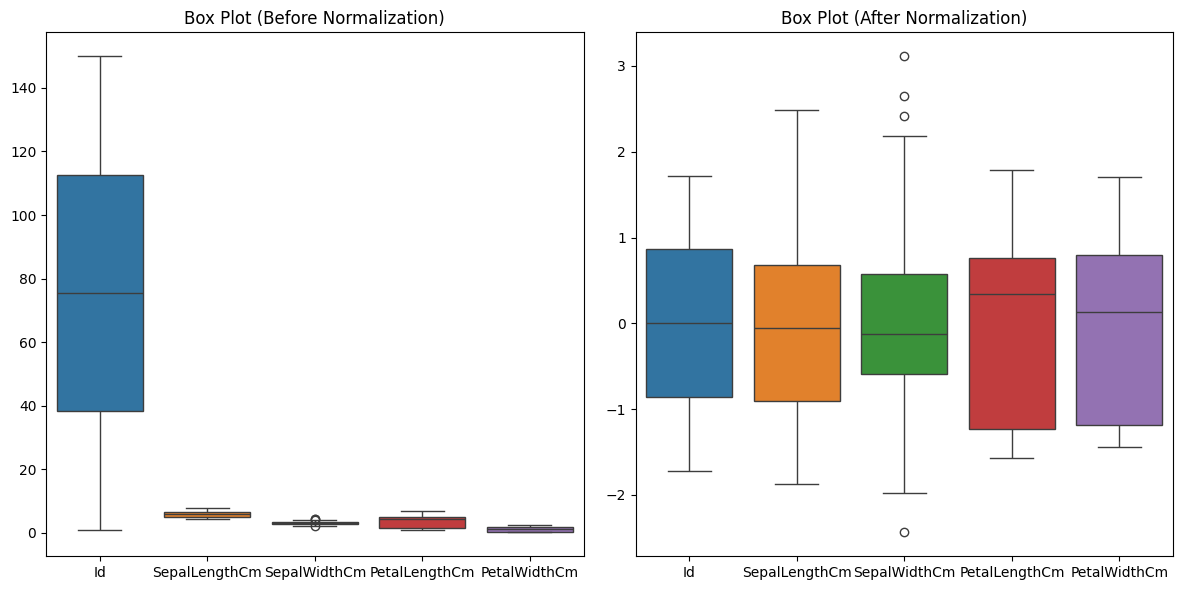

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris_path = 'iris.csv'
iris_df = pd.read_csv(iris_path)

# Rename columns
iris_df.columns = ['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

print("Original Iris Dataset:")
print(iris_df.head())

# Drop any rows with missing values
iris_df.dropna(inplace=True)

# Visualize boxplots before normalization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=iris_df.drop('Species', axis=1))
plt.title("Box Plot (Before Normalization)")

# Normalize the data using StandardScaler
scaler = StandardScaler()
iris_df_normalized = pd.DataFrame(scaler.fit_transform(iris_df.drop('Species', axis=1)), columns=iris_df.columns[:-1])
iris_df_normalized['Species'] = iris_df['Species']

# Visualize boxplots after normalization
plt.subplot(1, 2, 2)
sns.boxplot(data=iris_df_normalized.drop('Species', axis=1))
plt.title("Box Plot (After Normalization)")

plt.tight_layout()
plt.show()
